<a href="https://colab.research.google.com/github/tianygoulart/Machine-Leaning/blob/main/aula_2_ami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando os módulos
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#encontrando o dataframe
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [ ]:
#mostrando o dataset
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

In [ ]:
df.shape

(9568, 5)

**Análise Exploratória**

In [ ]:
#encontrando as estatísticas descritivas
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


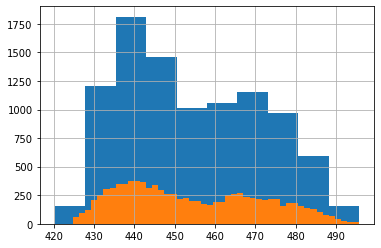

In [ ]:
#analisando a distribuição dos dados
df.PE.hist()
df.PE.hist(bins = 50);

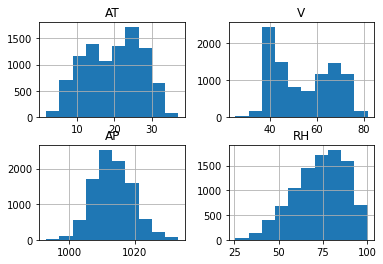

In [ ]:
df[['AT', 'V', 'AP', 'RH']].hist();

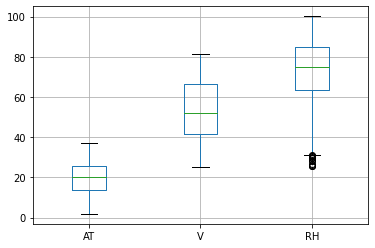

In [ ]:
df[['AT', 'V', 'RH']].boxplot();

**Engenharia de Características**

In [ ]:
#verificando a multicolinearidade
corr = df.corr()

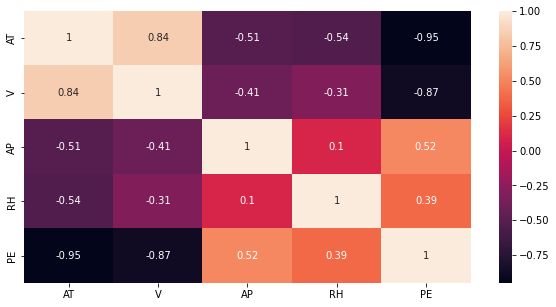

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

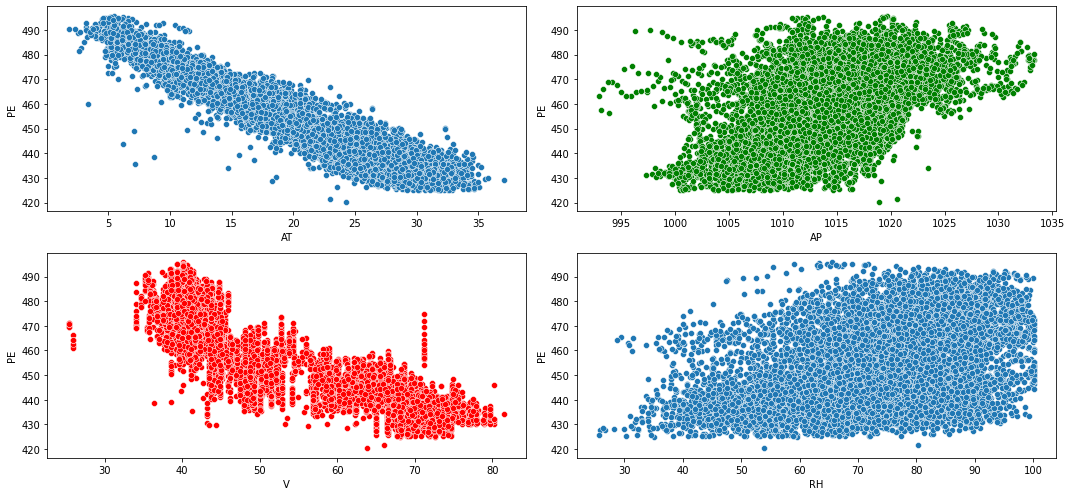

In [ ]:
f,axes=plt.subplots(2,2,figsize=(15,7))

sns.scatterplot(y='PE',x='AT',data=df,ax=axes[0,0])
sns.scatterplot(y='PE',x='AP',data=df,ax=axes[0,1],color='green')
sns.scatterplot(y='PE',x='V',data=df,ax=axes[1,0],color='red')
sns.scatterplot(y='PE',x='RH',data=df,ax=axes[1,1])

plt.tight_layout()


In [ ]:
#utilizando outros métodos para identificar multicolinearidade
#VIF (Variable Inflation Factors)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # calculando o VIF
    vif = pd.DataFrame()
    vif["variáveis"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


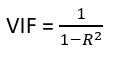

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

,variáveis,VIF
0,AT,39.157705
1,V,74.969127
2,AP,66.618618
3,RH,40.704756


In [ ]:
# começa em 1
# VIF < 5 -> baixa multicolinearidade
# VIF > 10 -> alta multicolinearidade

**Ajustando a multicolinearidade**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
feature_cols = ['AT', 'V', 'AP', 'RH']
poly_cols = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2']
X = df[feature_cols]
# Invoking polynomial feature transform method with degree of 2 for two variables
poly_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly_reg.fit_transform(X)

# Converting array into a Dataframe
X_poly = pd.DataFrame(X_poly, columns=poly_cols, index=df.index)

In [ ]:
#[a, b]
#[1, a, b, a^2, ab, b^2]

In [ ]:
X_poly.head()

,Coff,AT,V,AP,RH,AT2,AT*V,AT*AP,AT*RH,V2,V*AP,V*RH,AP2,AP*RH,RH2
0,1.0,14.96,41.76,1024.07,73.17,223.8016,624.7296,15320.0872,1094.6232,1743.8976,42765.1632,3055.5792,1.048719e+06,74931.2019,5353.8489
1,1.0,25.18,62.96,1020.04,59.08,634.0324,1585.3328,25684.6072,1487.6344,3963.9616,64221.7184,3719.6768,1.040482e+06,60263.9632,3490.4464
2,1.0,5.11,39.40,1012.16,92.14,26.1121,201.3340,5172.1376,470.8354,1552.3600,39879.1040,3630.3160,1.024468e+06,93260.4224,8489.7796
3,1.0,20.86,57.32,1010.24,76.64,435.1396,1195.6952,21073.6064,1598.7104,3285.5824,57906.9568,4393.0048,1.020585e+06,77424.7936,5873.6896
4,1.0,10.82,37.50,1009.23,96.62,117.0724,405.7500,10919.8686,1045.4284,1406.2500,37846.1250,3623.2500,1.018545e+06,97511.8026,9335.4244


**Aplicando os algoritmos sem a transformação**

In [ ]:
#aplicando a normalização para os dados
scaler = MinMaxScaler()
X_new = scaler.fit_transform(df[['AT', 'V', 'AP', 'RH']])

In [ ]:
#aplicando a normalização para os dados de saída
target_scaler = MinMaxScaler()

Y_new = target_scaler.fit_transform(df['PE'].values.reshape(-1,1))

In [ ]:
#dividindo os dados entre treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

**Aplicando a Floresta Randomica**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rnf = RandomForestRegressor(n_estimators=300)
rnf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
y_preds = rnf.predict(X_test)

print("RMSE : {:.3f} ".format(mean_squared_error(y_test, y_preds, squared=False)))

RMSE : 0.047 


**Aplicando uma MLP**

In [ ]:
# camada inicial e o tipo 
from tensorflow import keras
from tensorflow.keras import layers

#entradas

# criando o formato da entrada
input_shape = (X_train.shape[1],)
print(f'Shape das entradas: {input_shape}')

Shape das entradas: (4,)


In [ ]:
# Criando o modelo
model = keras.Sequential()
model.add(layers.Dense(16, input_shape=input_shape, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [ ]:
#mostrando o modelo
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#treina o modelo
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/10
4592/4592 [==============================] - 7s 1ms/step - loss: 0.0472 - mean_squared_error: 0.0035 - val_loss: 0.0448 - val_mean_squared_error: 0.0034
Epoch 2/10
4592/4592 [==============================] - 6s 1ms/step - loss: 0.0469 - mean_squared_error: 0.0035 - val_loss: 0.0611 - val_mean_squared_error: 0.0060
Epoch 3/10
4592/4592 [==============================] - 7s 1ms/step - loss: 0.0468 - mean_squared_error: 0.0035 - val_loss: 0.0438 - val_mean_squared_error: 0.0032
Epoch 4/10
4592/4592 [==============================] - 7s 1ms/step - loss: 0.0465 - mean_squared_error: 0.0035 - val_loss: 0.0443 - val_mean_squared_error: 0.0032
Epoch 5/10
4592/4592 [==============================] - 6s 1ms/step - loss: 0.0460 - mean_squared_error: 0.0034 - val_loss: 0.0440 - val_mean_squared_error: 0.0032
Epoch 6/10
4592/4592 [==============================] - 7s 1ms/step - loss: 0.0460 - mean_squared_error: 0.0034 - val_loss: 0.0425 - val_mean_squared_error: 0.0031
Epoch 7/10
4592/

In [ ]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.55 0.54]
 [0.64 0.62]
 [0.3  0.31]
 ...
 [0.32 0.3 ]
 [0.29 0.26]
 [0.37 0.33]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.936265171248532

In [ ]:
print("RMSE : {:.3f} ".format(mean_squared_error(y_test, y_pred, squared=False)))

RMSE : 0.057 


**Aplicando os algoritmos com a transformação**

In [ ]:
#aplicando a normalização para os dados
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X_poly)

In [ ]:
#aplicando a normalização para os dados de saída
target_scaler = MinMaxScaler()

Y_new = target_scaler.fit_transform(df['PE'].values.reshape(-1,1))

In [ ]:
#dividindo os dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [ ]:
#aplicando a floresta randômica como regressora
rnf = RandomForestRegressor(n_estimators=300)
rnf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_preds = rnf.predict(X_test)

print("RMSE : {:.3f} ".format(mean_squared_error(y_test, y_preds, squared=False)))

In [ ]:
# criando o formato da entrada para o 
input_shape = (X_train.shape[1],)
print(f'Shape das entradas: {input_shape}')

Shape das entradas: (15,)


In [ ]:
# Criando o modelo
model = keras.Sequential()
model.add(layers.Dense(16, input_shape=input_shape, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [ ]:
#mostrando o modelo
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#treina o modelo
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=30,batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/30
460/460 [==============================] - 1s 2ms/step - loss: 0.0419 - mean_squared_error: 0.0029 - val_loss: 0.0413 - val_mean_squared_error: 0.0030
Epoch 2/30
460/460 [==============================] - 1s 2ms/step - loss: 0.0417 - mean_squared_error: 0.0029 - val_loss: 0.0413 - val_mean_squared_error: 0.0030
Epoch 3/30
460/460 [==============================] - 1s 2ms/step - loss: 0.0420 - mean_squared_error: 0.0029 - val_loss: 0.0432 - val_mean_squared_error: 0.0033
Epoch 4/30
460/460 [==============================] - 1s 2ms/step - loss: 0.0418 - mean_squared_error: 0.0030 - val_loss: 0.0416 - val_mean_squared_error: 0.0030
Epoch 5/30
460/460 [==============================] - 1s 2ms/step - loss: 0.0419 - mean_squared_error: 0.0029 - val_loss: 0.0418 - val_mean_squared_error: 0.0031
Epoch 6/30
460/460 [==============================] - 1s 2ms/step - loss: 0.0417 - mean_squared_error: 0.0029 - val_loss: 0.0408 - val_mean_squared_error: 0.0029
Epoch 7/30
460/460 [========

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

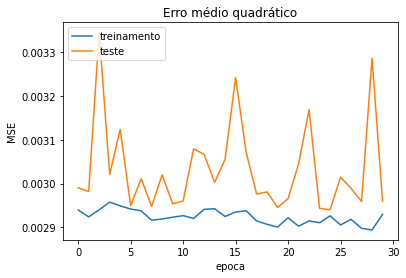

In [ ]:
#história do treinamento
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Erro médio quadrático')
plt.ylabel('MSE')
plt.xlabel('epoca')
plt.legend(['treinamento', 'teste'], loc='upper left')
plt.show()

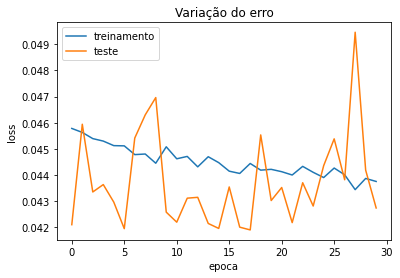

In [ ]:
# história do treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variação da função perda')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.legend(['treinamento', 'teste'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.58 0.54]
 [0.66 0.62]
 [0.27 0.31]
 ...
 [0.32 0.3 ]
 [0.28 0.26]
 [0.36 0.33]]


In [ ]:
r2_score(y_test,y_pred)

0.9365247167943204